# Analyse décès sur le territoire Français

Une analyse des impacts globaux du covid en s'abstrayant des biais de tests

In [236]:
# Generic imports
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date, datetime, timedelta

In [237]:
debug = True

In [238]:
t0 = datetime.now()

## data crunching

In [239]:
# Data from insee
# https://insee.fr/fr/statistiques/4487988?sommaire=4487854 
insee_file = "2021-01-15_deces_quotidiens_departement_csv.csv"
df_insee = pd.read_csv("./Data_FR_Deaths/" + insee_file, delimiter=";", index_col="Date_evenement", encoding='iso-8859-1')
df_insee

,Zone,Communes_a_envoi_dematerialise_Deces2020,Total_deces_2020,Communes_a_envoi_dematerialise_Deces2019,Total_deces_2019,Communes_a_envoi_dematerialise_Deces2018,Total_deces_2018
Date_evenement,,,,,,,
01-janv.,France,1734,1900,1663,1816,1820,2002
02-janv.,France,3478,3795,3409,3728,3743,4114
03-janv.,France,5254,5744,5092,5578,5667,6229
04-janv.,France,6908,7568,6822,7456,7635,8363
05-janv.,France,8478,9303,8549,9345,9525,10433
...,...,...,...,...,...,...,...
27-déc.,Dept_976,923,923,741,741,714,714
28-déc.,Dept_976,923,923,744,744,715,715
29-déc.,Dept_976,925,925,746,746,718,718


In [240]:
df_insee.index.str[-8:].unique()

Index(['01-janv.', '02-janv.', '03-janv.', '04-janv.', '05-janv.', '06-janv.',
       '07-janv.', '08-janv.', '09-janv.', '10-janv.',
       ...
       '22-déc.', '23-déc.', '24-déc.', '25-déc.', '26-déc.', '27-déc.',
       '28-déc.', '29-déc.', '30-déc.', '31-déc.'],
      dtype='object', name='Date_evenement', length=366)

In [241]:
# change in date format 
df_insee.reset_index(inplace=True)
type(df_insee['Date_evenement'])
df_insee['Date_evenement'].replace(to_replace ='-janv.', value = '/01/2020', regex = True, inplace=True)
df_insee['Date_evenement'].replace(to_replace ='-févr.', value = '/02/2020', regex = True, inplace=True)
df_insee['Date_evenement'].replace(to_replace ='-mars', value = '/03/2020', regex = True, inplace=True)
df_insee['Date_evenement'].replace(to_replace ='-avr.', value = '/04/2020', regex = True, inplace=True)
df_insee['Date_evenement'].replace(to_replace ='-mai', value = '/05/2020', regex = True, inplace=True)
df_insee['Date_evenement'].replace(to_replace ='-juin', value = '/06/2020', regex = True, inplace=True)
df_insee['Date_evenement'].replace(to_replace ='-juil.', value = '/07/2020', regex = True, inplace=True)
df_insee['Date_evenement'].replace(to_replace ='-août', value = '/08/2020', regex = True, inplace=True)
df_insee['Date_evenement'].replace(to_replace ='-sept.', value = '/09/2020', regex = True, inplace=True)
df_insee['Date_evenement'].replace(to_replace ='-oct.', value = '/10/2020', regex = True, inplace=True)
df_insee['Date_evenement'].replace(to_replace ='-nov.', value = '/11/2020', regex = True, inplace=True)
df_insee['Date_evenement'].replace(to_replace ='-déc.', value = '/12/2020', regex = True, inplace=True)
df_insee.set_index('Date_evenement', inplace=True)

### Vérification de l'intégrité des sommes

In [242]:
df_insee

,Zone,Communes_a_envoi_dematerialise_Deces2020,Total_deces_2020,Communes_a_envoi_dematerialise_Deces2019,Total_deces_2019,Communes_a_envoi_dematerialise_Deces2018,Total_deces_2018
Date_evenement,,,,,,,
01/01/2020,France,1734,1900,1663,1816,1820,2002
02/01/2020,France,3478,3795,3409,3728,3743,4114
03/01/2020,France,5254,5744,5092,5578,5667,6229
04/01/2020,France,6908,7568,6822,7456,7635,8363
05/01/2020,France,8478,9303,8549,9345,9525,10433
...,...,...,...,...,...,...,...
27/12/2020,Dept_976,923,923,741,741,714,714
28/12/2020,Dept_976,923,923,744,744,715,715
29/12/2020,Dept_976,925,925,746,746,718,718


In [243]:

check = df_insee[df_insee.loc[:,"Zone"]=="France"]
check

,Zone,Communes_a_envoi_dematerialise_Deces2020,Total_deces_2020,Communes_a_envoi_dematerialise_Deces2019,Total_deces_2019,Communes_a_envoi_dematerialise_Deces2018,Total_deces_2018
Date_evenement,,,,,,,
01/01/2020,France,1734,1900,1663,1816,1820,2002
02/01/2020,France,3478,3795,3409,3728,3743,4114
03/01/2020,France,5254,5744,5092,5578,5667,6229
04/01/2020,France,6908,7568,6822,7456,7635,8363
05/01/2020,France,8478,9303,8549,9345,9525,10433
...,...,...,...,...,...,...,...
27/12/2020,France,601153,659470,553758,606246,549753,602838
28/12/2020,France,603104,661573,555419,608072,551419,604672
29/12/2020,France,604924,663557,556968,609773,552991,606394


In [244]:
check_2 = df_insee[df_insee.loc[:,"Zone"]!="France"].groupby('Date_evenement').sum()

In [245]:
check_2

,Communes_a_envoi_dematerialise_Deces2020,Total_deces_2020,Communes_a_envoi_dematerialise_Deces2019,Total_deces_2019,Communes_a_envoi_dematerialise_Deces2018,Total_deces_2018
Date_evenement,,,,,,
01/01/2020,1734,1900,1663,1816,1820,2002
01/02/2020,53910,59095,57037,62576,56199,61560
01/03/2020,100946,110536,107852,118146,104122,114130
01/04/2020,159950,174690,156635,171601,158755,174188
01/05/2020,219965,240381,201586,220730,204433,224325
...,...,...,...,...,...,...
31/05/2020,263077,287975,245034,268176,246832,270700
31/07/2020,347849,381456,331615,362801,332081,364107
31/08/2020,392715,430743,374532,409868,375185,411312


In [246]:
check_3 = check.join(check_2, rsuffix="_sum",)[["Total_deces_2020","Total_deces_2019","Total_deces_2018", "Total_deces_2020_sum","Total_deces_2019_sum","Total_deces_2018_sum"]]

In [247]:
(check_3["Total_deces_2020"]-check_3["Total_deces_2020_sum"]).describe()

count    366.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
dtype: float64

In [248]:
(check_3["Total_deces_2019"]-check_3["Total_deces_2019_sum"]).describe()

count    366.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
dtype: float64

In [249]:
(check_3["Total_deces_2018"]-check_3["Total_deces_2018_sum"]).describe()

count    366.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
dtype: float64

### filtrage et reformation du df insee

In [250]:
df_insee = df_insee[df_insee["Zone"]=="France"][["Total_deces_2020"]]
df_insee

,Total_deces_2020
Date_evenement,
01/01/2020,1900
02/01/2020,3795
03/01/2020,5744
04/01/2020,7568
05/01/2020,9303
...,...
27/12/2020,659470
28/12/2020,661573
29/12/2020,663557


In [251]:
df_insee.columns=[2020]
df_insee.sort_index(axis=1,inplace=True)

## Main dataframe

In [252]:
# our main dataframe to compile all data 2020 and before 
df_wp = df_insee.diff()
df_wp.index = pd.to_datetime(df_wp.index, dayfirst=True)

## 2020 

In [253]:
df_2020 = df_insee.diff()
#filtre avant mars (input historique)
#df_2020 = df_insee.filter(axis=0,regex="\d\d\/(0[3-9]|1[0-2])").diff()
df_2020.index = pd.to_datetime(df_2020.index, dayfirst=True)
df_2020 

,2020
Date_evenement,
2020-01-01,NaN
2020-01-02,1895.0
2020-01-03,1949.0
2020-01-04,1824.0
2020-01-05,1735.0
...,...
2020-12-27,1988.0
2020-12-28,2103.0
2020-12-29,1984.0


In [254]:
# first date is unkown as diff cannot be applied on first element
#pour première données en janvier
df_2020.loc["2020/01/01",:]=df_insee.loc["01/01/2020",:]
#pour première données en Mars
#df_2020.loc["2020/03/01",:]=df_insee.loc["01/03/2020",:]

In [255]:

# first date is unkown as diff cannot be applied on first element
df_wp.loc["2020/03/01",:]=df_insee.loc["01/03/2020",:]

In [256]:
df_wp = df_2020

In [257]:
df_wp

,2020
Date_evenement,
2020-01-01,1900.0
2020-01-02,1895.0
2020-01-03,1949.0
2020-01-04,1824.0
2020-01-05,1735.0
...,...
2020-12-27,1988.0
2020-12-28,2103.0
2020-12-29,1984.0


In [258]:
derniere_photo = df_wp.dropna().index.max().date()
print(f"Dernière date trouvée : {derniere_photo}")

Dernière date trouvée : 2020-12-31


## Données de références

In [259]:
# données historiques
df_histo_csv = pd.read_csv("./Data_FR_Deaths/" + 'histo_deces.csv', index_col = 0)
# remove badly formatted data and before 2000
df_histo_csv = df_histo_csv.filter(regex = '2[0-9]{3}\-[0-1][0-9]\-[0-3][0-9]', axis=0)
# transform index into dates
#df_histo_csv.index = pd.to_datetime(df_histo_csv.index, format = "%Y-%m-%d")
df_histo_csv.index = pd.DatetimeIndex(df_histo_csv.index)
# Add info for reference
df_histo_csv.reset_index(inplace=True)



In [260]:
df_histo_csv.sort_values(by="date_deces").tail()

,date_deces,nbr_deces
7390,2020-03-26,1647
7391,2020-03-27,1178
7392,2020-03-28,853
7393,2020-03-29,559
7394,2020-03-30,179


### Data for 2020, 2021 and references

In [261]:
#import datetime
base = datetime.fromisoformat("2020-01-01")
date_list = [base + timedelta(days=x) for x in range(366)]

In [262]:
df_histo = pd.DataFrame(date_list)
df_histo.columns = ['date_ref']
df_histo['year'] = pd.DatetimeIndex(df_histo['date_ref']).year
#df_histo['week'] = pd.DatetimeIndex(df_histo['date_ref']).weekofyear
df_histo['week'] = pd.DatetimeIndex(df_histo['date_ref']).isocalendar().week
df_histo['dow'] = pd.DatetimeIndex(df_histo['date_ref']).weekday  + 1
#df_histo['ref'] = df_histo['week'].astype('str') + "-" + df_histo['dow'].astype('str')
df_histo['ref'] = df_histo['date_ref'] 

In [263]:
lst_years = range(2019,1999,-1)

In [264]:
# Join the references same dow last year (-364d)
for x in lst_years:
    df_histo['ref'] = df_histo['ref'] - pd.Timedelta(days=364)
    df_histo = df_histo.join(df_histo_csv.set_index('date_deces'), on=['ref'],rsuffix='_'+str(x), how='left')


In [265]:
df_histo.drop(['year','week','dow','ref'], axis=1, inplace=True)
df_histo.set_index('date_ref',inplace=True)
df_histo.columns=lst_years

In [266]:
df_histo['max'] = df_histo.max(axis=1)
df_histo['min'] = df_histo.min(axis=1)

In [267]:
df_histo

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,...,2007,2006,2005,2004,2003,2002,2001,2000,max,min
date_ref,,,,,,,,,,,,,,,,,,,,,
2020-01-01,1935,2137,2251,1799,1969,1686,1742,1686,1785,1796,...,1665,1665,1604,1702,1706,1830,1728,1886,2251,1604
2020-01-02,1880,2160,2271,1731,1920,1750,1868,1716,1691,1790,...,1539,1631,1625,1597,1677,1816,1585,1969,2271,1539
2020-01-03,1900,2102,2260,1721,1965,1699,1777,1692,1714,1728,...,1579,1602,1573,1561,1556,1856,1633,1979,2260,1556
2020-01-04,1921,2020,2239,1741,1936,1693,1793,1648,1725,1694,...,1600,1548,1668,1633,1632,1851,1625,1975,2239,1548
2020-01-05,1896,2008,2228,1745,1903,1562,1675,1642,1633,1577,...,1446,1599,1533,1541,1572,1788,1633,1995,2228,1446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,1715,1756,1973,2206,1726,1856,1618,1706,1713,1673,...,1682,1532,1594,1458,1448,1772,1872,1540,2206,1448
2020-12-28,1892,1890,2027,2371,1835,1978,1786,1787,1736,1759,...,1722,1658,1577,1652,1614,1851,1916,1764,2371,1577
2020-12-29,1800,1839,2142,2353,1778,1848,1781,1803,1776,1803,...,1803,1557,1734,1619,1675,1774,1852,1646,2353,1557


In [268]:
df_histo_moyenne = df_histo[lst_years].mean(axis=1)

In [269]:
df_histo_moyenne

date_ref
2020-01-01    1812.85
2020-01-02    1795.40
2020-01-03    1780.10
2020-01-04    1777.60
2020-01-05    1734.35
               ...   
2020-12-27    1724.35
2020-12-28    1832.50
2020-12-29    1824.45
2020-12-30    1813.80
2020-12-31    1792.00
Length: 366, dtype: float64

### Complement données début 2020 
Jan-Feb depuis historique

In [270]:
deb_2020 = pd.date_range("2020-01-01", "2020-02-29")

df_deb_2020 = df_histo_csv.set_index('date_deces').loc[deb_2020, :]
df_deb_2020.columns = [2020]
df_deb_2020.describe()

,2020
count,60.000000
mean,1811.566667
std,83.341317
min,1637.000000
25%,1754.000000
50%,1802.500000
75%,1866.500000
max,1996.000000


In [271]:
df_wp.describe
df_wp = df_wp.append(df_deb_2020)


In [272]:
df_wp= df_wp.sort_index()


## Comparaison décès par jour 2020 vs références

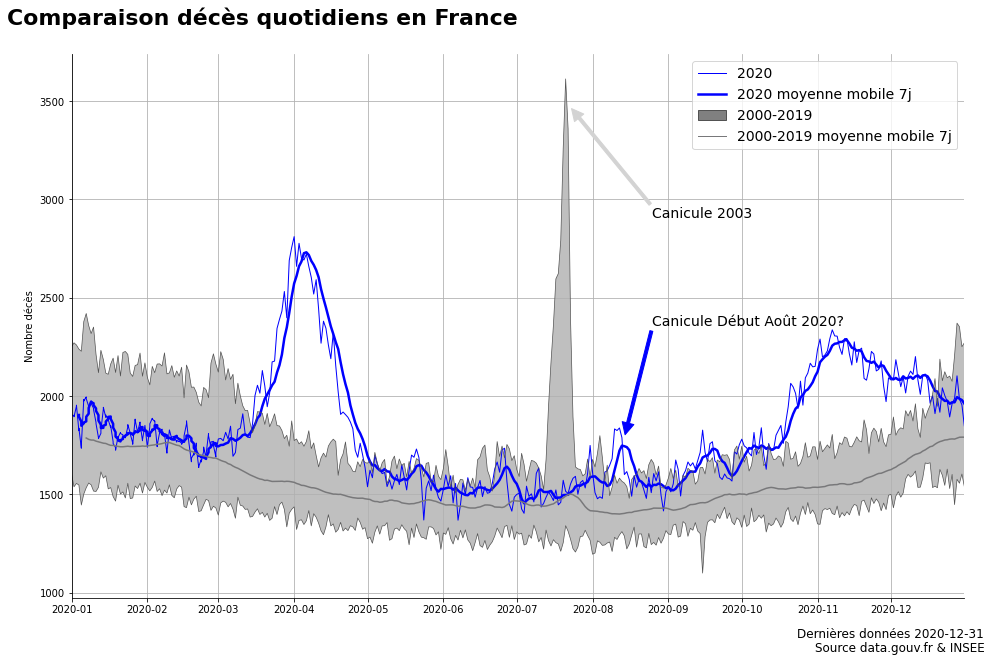

In [273]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

# Figure et axe principaux
# ########################
fig, ax = plt.subplots(figsize=(16,10))

# courbe 2020
ax.plot(df_wp, label='2020', linewidth=1, color='blue')
# moyenne mobile
ax.plot(df_wp.rolling(7).mean(), label='2020 Moyenne mobile 7', linewidth=2.5, color='blue' )


# defining area of reference
# ##########################

# Boundaries
ax.plot(df_histo[['min','max']], label='2000-2019', color="#525252",linewidth=0.7 )
# moyenne
ax.plot(df_histo_moyenne.rolling(7).mean(), label="Moyenne 2020*2019", color="#78787a", linewidth=1.5)

# fill
ax.fill_between(date_list, df_histo['min'], df_histo['max'], facecolor='grey', alpha=0.5)


# layout
ax.set_title("Comparaison décès quotidiens en France", fontsize=22, pad=30, fontweight = 'bold',horizontalalignment='right')
#ax.set_xlabel("date du jour")
ax.set_ylabel("Nombre décès")
ax.grid(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.margins(0.05)
ax.set_xlim([pd.to_datetime('2020-01-01'),pd.to_datetime('2020-12-31')])

# define legend
# #############
legend_elements = [Line2D([0], [0], color='blue', lw=1, label='2020'),
                   Line2D([0], [0], color='blue', lw=2.5, label='2020 moyenne mobile 7j'),
                   Patch(facecolor='grey', edgecolor='#525252',
                         label='2000-2019'),
                   Line2D([0], [0], color='#78787a', lw=1, label='2000-2019 moyenne mobile 7j'),
                  ]
ax.legend(handles=legend_elements, fontsize=14)

fig.text(0.77, 0.05, "Source data.gouv.fr & INSEE", fontsize=12)
fig.text(0.755, 0.07, f"Dernières données {derniere_photo}", fontsize=12)


# Commentaires
ax.annotate("Canicule 2003", xy=(0.56, 0.9), xytext=(0.65, 0.7), xycoords = "axes fraction",
            arrowprops={"width":3,"edgecolor":"lightgrey", "facecolor":"lightgrey"}, fontsize=14, )


ax.annotate("Canicule Début Août 2020?", xy=(0.62, 0.3), xytext=(0.65, 0.5), xycoords = "axes fraction",
            arrowprops={"width":3, "edgecolor":"blue", "facecolor":"blue"}, fontsize=14)

#arrowprops=dict(arrowstyle="->", width=4)
fig.savefig("deces_fr-"+ str(date.today()) +".png")


# Cumul des décès cumulés

In [274]:
# Calculs des cumuls

data_cum_2020 = df_wp.cumsum()
data_cum_2000_2019 = df_histo.mean(axis=1).cumsum()

derniere_augmentation_cum = data_cum_2020.max().values[0] / data_cum_2000_2019[data_cum_2020.idxmax()].values[0] - 1

augmentation_cum = data_cum_2020.join(pd.DataFrame(data_cum_2000_2019))
augmentation_cum.fillna(0)
augmentation_cum.columns = ['2020', 'ref']
augmentation_cum['evol'] = augmentation_cum['2020'] - augmentation_cum['ref'] 



In [275]:
augmentation_cum['2020'].idxmax()

Timestamp('2020-12-31 00:00:00')

In [276]:
def position_fleche(ax, pourcentages, last_pct):
    
    x_max = pourcentages['2020'].idxmax()
    share_of_year = (x_max - pd.to_datetime("2020-01-01")).days/365 
    dernier_pourcentage = last_pct
    y_last = pourcentages.loc[x_max, 'evol']
   
    y_min, y_max = min(ax.get_yticks()), max(ax.get_yticks())
    
    y_fleche = (y_last - y_min ) / (y_max - y_min)
    print(y_fleche, y_max)
    ax.annotate(f"{dernier_pourcentage*100:+.1f}%", xy=(share_of_year , y_fleche + 0.02), xytext=(max(min(share_of_year+0.1,0.8),0.2), max(min(y_fleche+0.1,0.8),0.2)), xycoords = "axes fraction",
            arrowprops={"width":3, "edgecolor":"blue", "facecolor":"blue"}, fontsize=14)


<ipython-input-277-d42799a0226c>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_cum.set_yticklabels([f"{t:,.0f} ".replace(","," ") for t in ax_cum.get_yticks()])


0.8499990909090918 250000.0


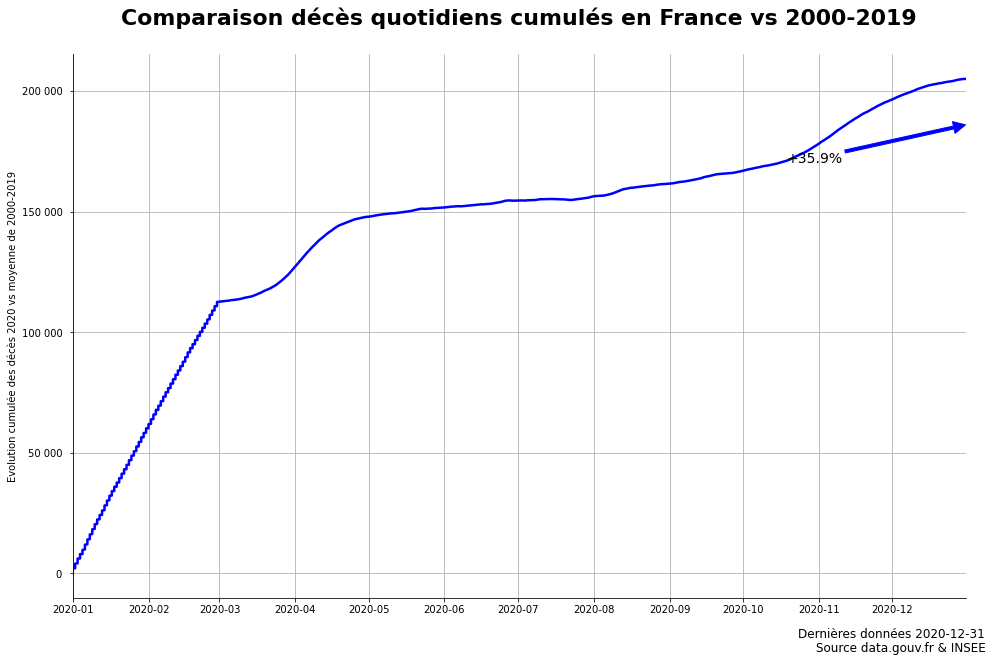

In [277]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

# Figure et axe principaux
# ########################
fig_cum, ax_cum = plt.subplots(figsize=(16,10))


# evolution vs ref
ax_cum.plot(augmentation_cum['evol'], label='2020', linewidth=2.5, color='blue')


# layout
ax_cum.set_title("Comparaison décès quotidiens cumulés en France vs 2000-2019", fontsize=22, pad=30, fontweight = 'bold',horizontalalignment='center')
#ax.set_xlabel("date du jour")
ax_cum.set_ylabel("Evolution cumulée des décès 2020 vs moyenne de 2000-2019")
ax_cum.grid(True)
ax_cum.spines['top'].set_visible(False)
ax_cum.spines['right'].set_visible(False)
ax_cum.margins(0.05)
ax_cum.set_xlim([pd.to_datetime('2020-01-01'),pd.to_datetime('2020-12-31')])
ax_cum.set_yticklabels([f"{t:,.0f} ".replace(","," ") for t in ax_cum.get_yticks()])


fig_cum.text(0.755, 0.07, f"Dernières données {derniere_photo}", fontsize=12)
fig_cum.text(0.77, 0.05, "Source data.gouv.fr & INSEE", fontsize=12)


# Commentaires
position_fleche(ax_cum, augmentation_cum, derniere_augmentation_cum)


fig_cum.savefig("deces_cum_fr-"+ str(date.today()) +".png")


In [278]:
# final processing
t1 = datetime.now()
print(f"Temps passé {t1-t0}")

Temps passé 0:00:01.344965


In [279]:
data_cum_2000_2019[data_cum_2020.idxmax()].values[0]

571055.2727272725